In [1]:
#main packages
import pandas as pd
import numpy as np

#represent data
import matplotlib.pyplot as plt
import seaborn as sns

#alogorithms
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data_all=pd.read_csv("data.csv")

In [3]:
data_all.head(10)

,threat_type,threat_count,defense_type,defense_count,neutralized
0,6,5,3,1,1
1,4,1,2,3,0
2,1,3,4,2,1
3,5,7,1,8,0
4,3,2,5,4,1
5,2,20,3,2,1
6,6,1,1,1,1
7,4,4,2,1,0
8,5,3,4,6,0
9,2,10,3,5,1


In [4]:
print(f"Columns list :\n{data_all.columns}")

Columns list :
Index(['threat_type', 'threat_count', 'defense_type', 'defense_count',
       'neutralized'],
      dtype='object')


In [5]:
data_all.describe().T

,count,mean,std,min,25%,50%,75%,max
threat_type,154.0,3.519481,1.746035,1.0,2.0,4.0,5.0,6.0
threat_count,154.0,5.253247,4.442165,1.0,3.0,4.0,6.0,30.0
defense_type,154.0,3.162338,1.374230,1.0,2.0,3.0,4.0,5.0
defense_count,154.0,2.642857,1.403444,1.0,2.0,2.0,3.0,8.0
neutralized,154.0,0.623377,0.486120,0.0,0.0,1.0,1.0,1.0


In [6]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   threat_type    154 non-null    int64
 1   threat_count   154 non-null    int64
 2   defense_type   154 non-null    int64
 3   defense_count  154 non-null    int64
 4   neutralized    154 non-null    int64
dtypes: int64(5)
memory usage: 6.1 KB


In [7]:
missingValues = data_all.columns[data_all.isnull().any()]                 # searches for columns with missing values
print(f"No of missing values:\n{data_all[missingValues].isnull().sum()}") # display no of missing values for each column
nullValues = data_all.columns[data_all.isna().any()]                      # identify whether values are null or NaN
print(f"Null or NAN values:\n{data_all[nullValues].isna().sum()}")  

No of missing values:
Series([], dtype: float64)
Null or NAN values:
Series([], dtype: float64)


In [8]:
data_all["neutralized"].describe()

count    154.000000
mean       0.623377
std        0.486120
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: neutralized, dtype: float64

Text(0, 0.5, 'Number of attempts')

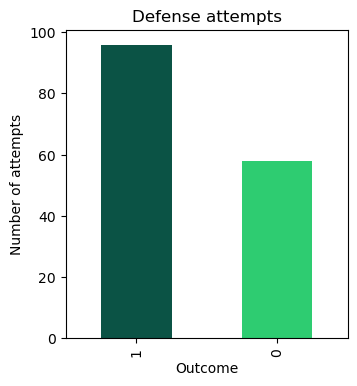

In [9]:
len(data_all)
neutralized = len(data_all[data_all['neutralized'] == 1])
non_neutralized = len(data_all[data_all['neutralized'] == 0])

plt.figure(figsize = (10,5)) #  set the figure size of the plot
plt.subplot(121) # creates a subplot with 1 row and 2 columns and selects the first column for plotting the bar chart

# display the bar chart
vis_defense = data_all.neutralized.value_counts().plot(figsize=(8, 4), kind="bar", color = ["#0B5345", "#2ECC71", "#1ABC9C"])
plt.title("Defense attempts")
plt.xlabel("Outcome") 
plt.ylabel("Number of attempts") 


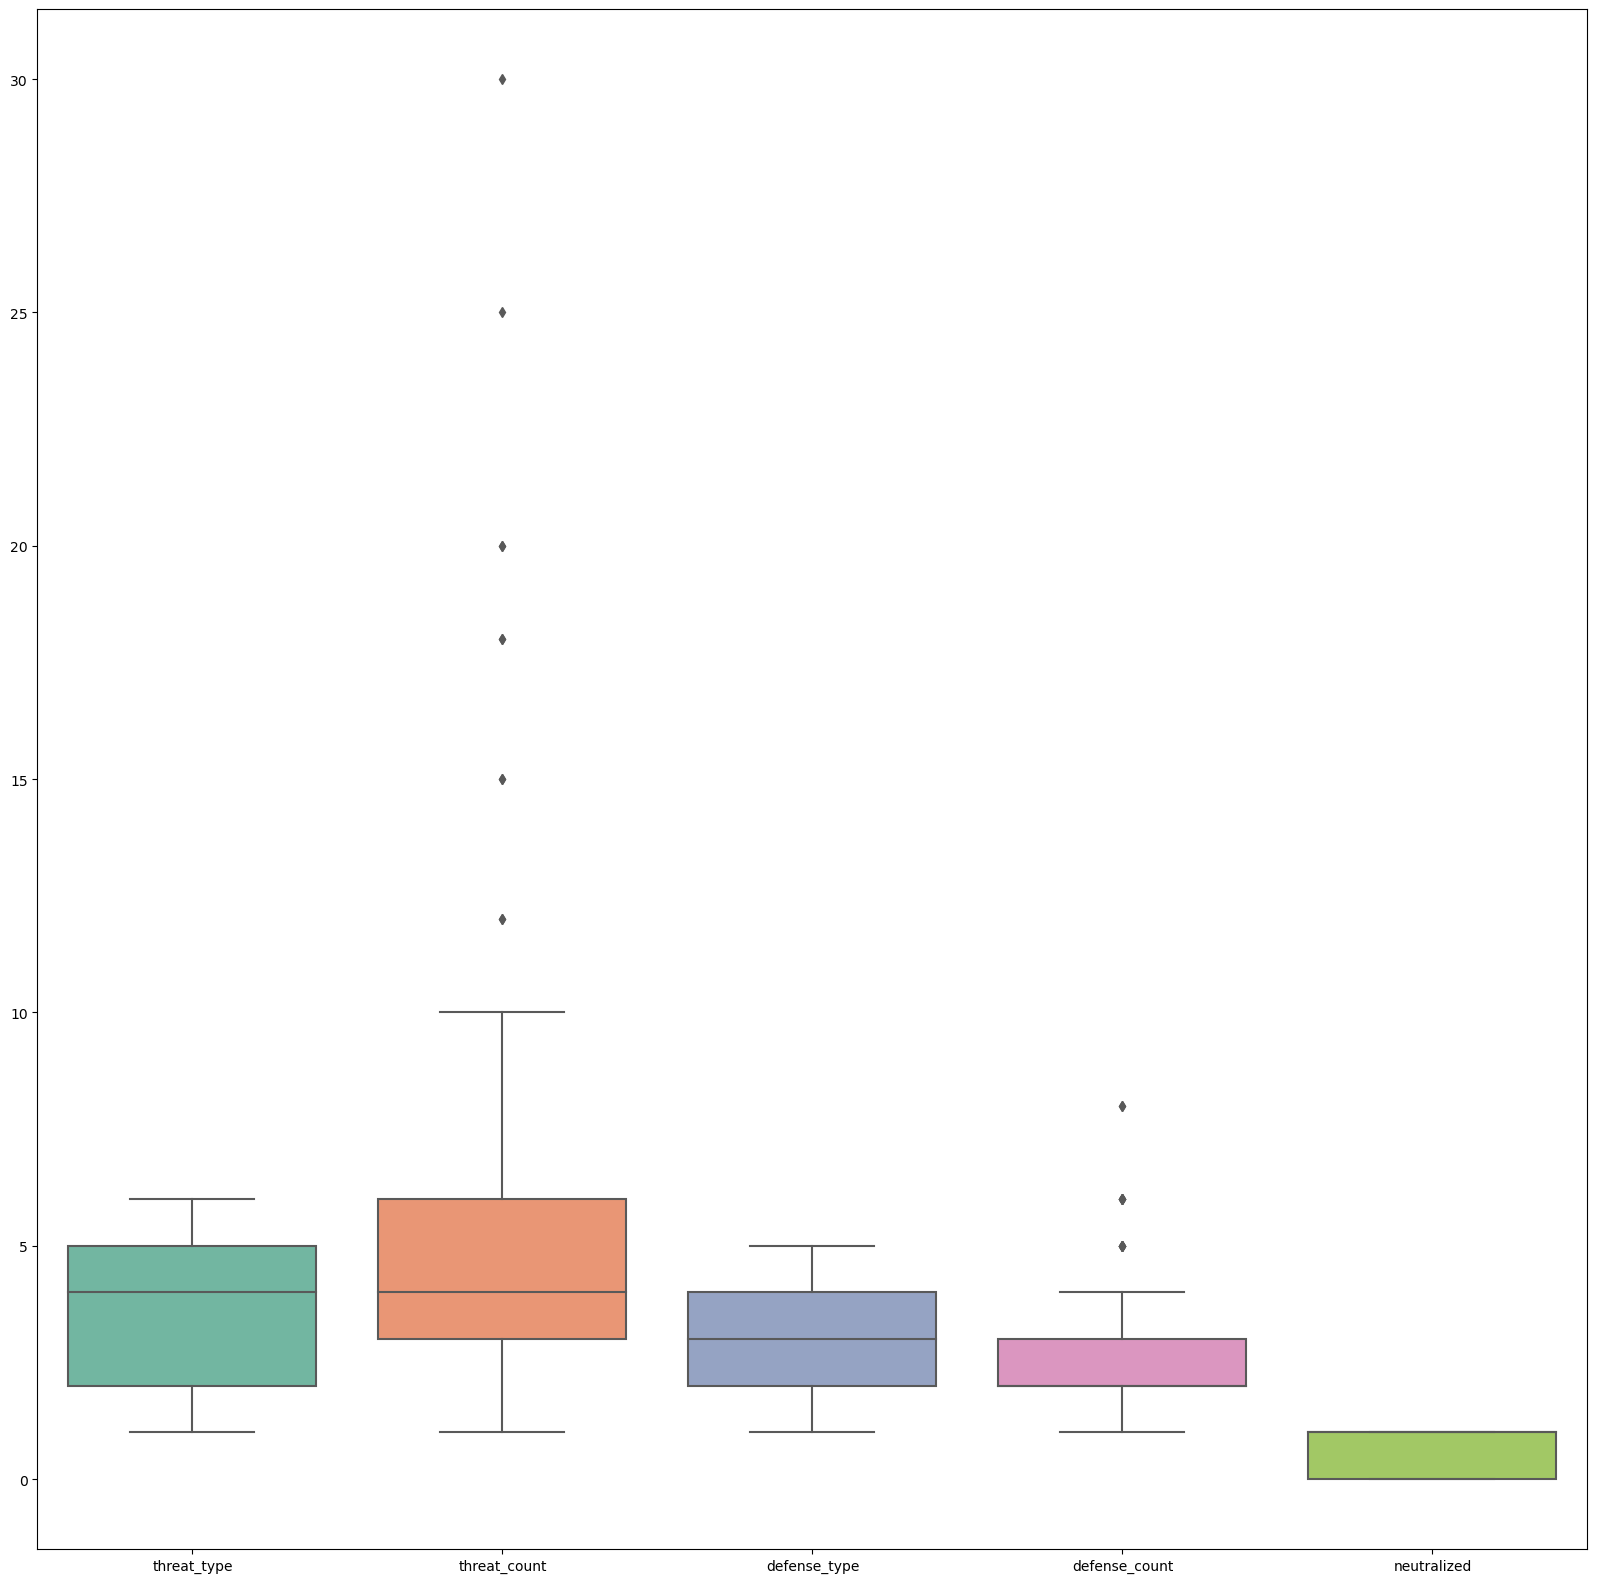

In [10]:
plt.figure(figsize=(20,20))
sns.boxplot(data = data_all, palette = "Set2")
plt.show()

In [11]:
lowerlimit = data_all.threat_count.mean() - 3*data_all.threat_count.std() # define upper limit
upperlimit = data_all.threat_count.mean() + 3*data_all.threat_count.std() # define lower limit
data_all = data_all[(data_all.threat_count > lowerlimit) & (data_all.threat_count < upperlimit)] #extracts data within the upper and lower limits using mean histogram_variance field
data_all.shape[0] #no of records after outlier removal

150

In [12]:
lowerlimit = data_all.defense_count.mean() - 3*data_all.defense_count.std() # define upper limit
upperlimit = data_all.defense_count.mean() + 3*data_all.defense_count.std() # define lower limit
data_all = data_all[(data_all.defense_count > lowerlimit) & (data_all.defense_count < upperlimit)] #extracts data within the upper and lower limits using mean histogram_variance field
data_all.shape[0] #no of records after outlier removal

148

In [13]:
col = ['threat_type', 'threat_count', 'defense_type', 'defense_count']
scale_of_X = StandardScaler() #feature scaling
X1 =  pd.DataFrame(scale_of_X.fit_transform(data_all.drop(["neutralized"],axis = 1),), columns = col)

In [14]:
X1.head(10)

,threat_type,threat_count,defense_type,defense_count
0,1.406171,0.083917,-0.118297,-1.249942
1,0.262691,-1.158050,-0.847795,0.394426
2,-1.452528,-0.537067,0.611201,-0.427758
3,-0.309049,-0.847558,1.340699,1.216610
4,1.406171,-1.158050,-1.577293,-1.249942
5,0.262691,-0.226575,-0.847795,-1.249942
6,0.834431,-0.537067,0.611201,2.860979
7,-0.880788,1.636375,-0.118297,2.038795
8,-0.309049,0.394408,1.340699,-0.427758
9,-1.452528,-0.847558,-1.577293,0.394426


In [15]:
y1 = data_all["neutralized"]


In [16]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 40, stratify = y1)

In [17]:
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((103, 4), (45, 4), (103,), (45,))

In [18]:
knn1 = KNeighborsClassifier() # This code fits a KNN (K-Nearest Neighbors) classifier to the training data and evaluates its performance on the test data.
knn_mod1 = knn1.fit(X_train1, y_train1)
print(f"Baseline KNN: {round(knn_mod1.score(X_test1, y_test1), 3)}")

pred_knn1 = knn_mod1.predict(X_test1)

Baseline KNN: 0.644


In [19]:
# splits training data into 3 sets
cv_method1 = StratifiedKFold(n_splits=3,shuffle=True, 
                            random_state=40
                            )

scores_knn1 = cross_val_score(knn1, X_train1, y_train1, cv = cv_method1, n_jobs = 2, scoring = "accuracy")

print(f" Cross validation of KNN model:\n{scores_knn1}")
print(f"Mean: {round(scores_knn1.mean(), 3)}")print(f"Standard Deviation: {round(scores_knn1.std(), 3)}")

 Cross validation of KNN model:
[0.6        0.58823529 0.58823529]
Mean: 0.592
Standard Deviation: 0.006


In [20]:
params_knn1 = {"leaf_size": list(range(1,30)), # leaf_size affecting the speed of the construction of the tree
              "n_neighbors": list(range(1,21)), # number of neighbors to use for classification 
              "p": [1,2]} # p: the distance metric to use for the tree (1 for Manhattan distance, 2 for Euclidean distance)

In [21]:
GridSearchCV_knn1 = GridSearchCV(estimator=KNeighborsClassifier(), 
                                param_grid=params_knn1, 
                                cv=cv_method1,
                                verbose=1, 
                                n_jobs=-1,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [22]:
GridSearchCV_knn1.fit(X_train1, y_train1);

Fitting 3 folds for each of 1160 candidates, totalling 3480 fits


In [23]:
best_estimator_knn1 = GridSearchCV_knn1.best_estimator_
print(f"Best estimator for K-Nearest Neighbors model:\n{best_estimator_knn1}") # prints the best estimator for the K-Nearest Neighbors model that was found using GridSearchCV.

Best estimator for K-Nearest Neighbors model:
KNeighborsClassifier(leaf_size=1, n_neighbors=1)


In [24]:
best_params_knn1 = GridSearchCV_knn1.best_params_
print(f"Best parameter values:\n{best_params_knn1}") 

Best parameter values:
{'leaf_size': 1, 'n_neighbors': 1, 'p': 2}


In [25]:
best_score_knn1 = GridSearchCV_knn1.best_score_
print(f"Best score for GNB model: {round(best_score_knn1, 3)}")

Best score for GNB model: 0.737


In [26]:
knn1 = KNeighborsClassifier(leaf_size=1, n_neighbors=3 , p=1)
knn_mod1 = knn1.fit(X_train1, y_train1)
pred_knn1 = knn_mod1.predict(X_test1)

mse_knn1 = mean_squared_error(y_test1, pred_knn1)
rmse_knn1 = np.sqrt(mean_squared_error(y_test1, pred_knn1))
score_knn_train1 = knn_mod1.score(X_train1, y_train1)
score_knn_test1 = knn_mod1.score(X_test1, y_test1)

In [27]:
print(f"Mean Square Error  = {round(mse_knn1, 3)}")
print(f"Root Mean Square = {round(rmse_knn1, 3)}")
print(f"R^2 on training set = {round(score_knn_train1, 3)}")
print(f"R^2 on testing set = {round(score_knn_test1, 3)}")

Mean Square Error  = 0.444
Root Mean Square = 0.667
R^2 on training set = 0.854
R^2 on testing set = 0.556


print("Classification Report")
print(classification_report(y_test1, pred_knn1))

confusion Matrix:
[[ 8  9]
 [11 17]]


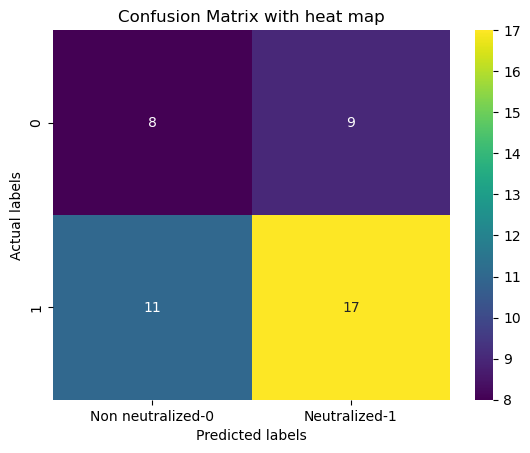

In [30]:
# This code creates a confusion matrix and its heatmap of the predictions
print("confusion Matrix:")
print(confusion_matrix(y_test1, pred_knn1))

ax1= plt.subplot()
sns.heatmap(confusion_matrix(y_test1, pred_knn1), annot=True, ax = ax1, cmap = "viridis");

ax1.set_xlabel("Predicted labels"); # x-axis label
ax1.set_ylabel("Actual labels");      # y-axis label
ax1.set_title("Confusion Matrix with heat map");  # title
ax1.xaxis.set_ticklabels(["Non neutralized-0", "Neutralized-1"]); # ticks